<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W6_FRI_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


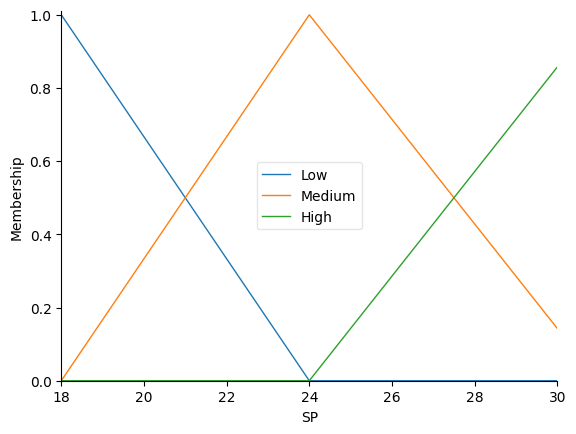

In [51]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Set point (SP)
# Val_Sensor (VS)
# PWM

SP = ctrl.Antecedent(np.arange(18,31,1),'SP')    # 18->30 (C)
VS = ctrl.Antecedent(np.arange(-5,61,1),'VS')    # -5->60(C)
PWM = ctrl.Consequent(np.arange(0,266,1),'PWM')   # 0->255

SP['Low'] = fuzz.trimf(np.arange(18,31,1),[18,18,24])
SP['Medium'] = fuzz.trimf(np.arange(18,31,1),[18,24,31])
SP['High'] = fuzz.trimf(np.arange(18,31,1),[24,31,31])

SP.view()

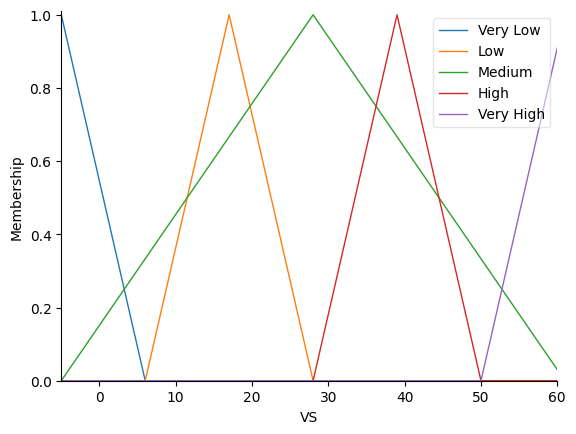

In [52]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Set point (SP)
# Val_Sensor (VS)
# PWM

SP = ctrl.Antecedent(np.arange(18,31,1),'SP')    # 18->30 (C)
VS = ctrl.Antecedent(np.arange(-5,61,1),'VS')    # -5->60(C)
PWM = ctrl.Consequent(np.arange(0,266,1),'PWM')  # 0->255

VS['Very Low'] = fuzz.trimf(np.arange(-5,61,1),[-5,-5,6])
VS['Low'] = fuzz.trimf(np.arange(-5,61,1),[6,17,28])
VS['Medium'] = fuzz.trimf(np.arange(-5,61,1),[-5,28,61])
VS['High'] = fuzz.trimf(np.arange(-5,61,1),[28,39,50])
VS['Very High'] = fuzz.trimf(np.arange(-5,61,1),[50,61,61]) 

VS.view()

117.76520846387348


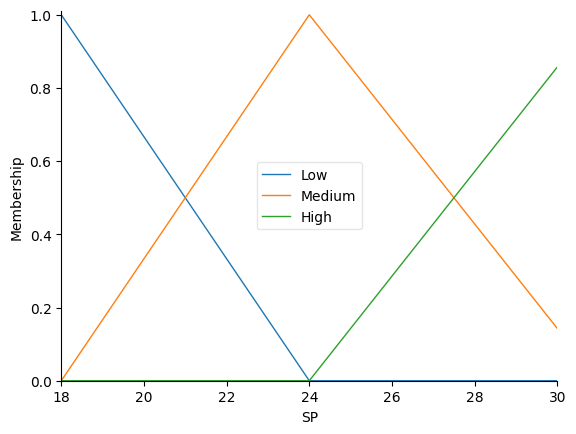

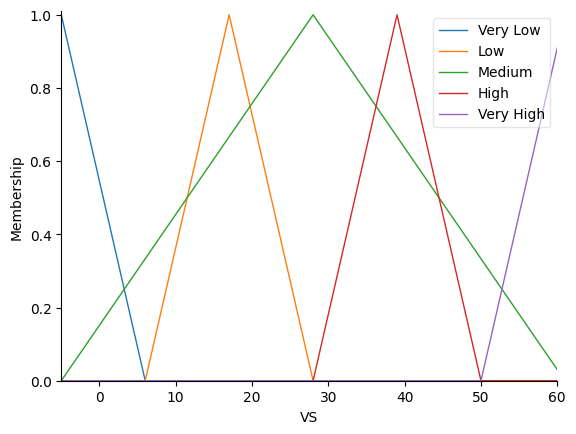

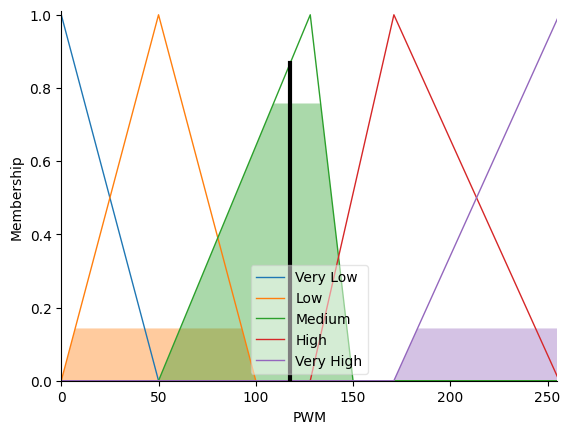

In [53]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Set point (SP)
# Val_Sensor (VS)
# PWM

SP = ctrl.Antecedent(np.arange(18,31,1),'SP')    # 18->30 (C)
VS = ctrl.Antecedent(np.arange(-5,61,1),'VS')    # -5->60(C)
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')  # 0->255

SP['Low'] = fuzz.trimf(np.arange(18,31,1),[18,18,24])
SP['Medium'] = fuzz.trimf(np.arange(18,31,1),[18,24,31])
SP['High'] = fuzz.trimf(np.arange(18,31,1),[24,31,31])

VS['Very Low'] = fuzz.trimf(np.arange(-5,61,1),[-5,-5,6])
VS['Low'] = fuzz.trimf(np.arange(-5,61,1),[6,17,28])
VS['Medium'] = fuzz.trimf(np.arange(-5,61,1),[-5,28,61])
VS['High'] = fuzz.trimf(np.arange(-5,61,1),[28,39,50])
VS['Very High'] = fuzz.trimf(np.arange(-5,61,1),[50,61,61]) 

PWM['Very Low'] = fuzz.trimf(np.arange(0,256,1),[0,0,50])
PWM['Low'] = fuzz.trimf(np.arange(0,256,1),[0,50,100])
PWM['Medium'] = fuzz.trimf(np.arange(0,256,1),[50,128,150])
PWM['High'] = fuzz.trimf(np.arange(0,256,1),[128,171,256])
PWM['Very High'] = fuzz.trimf(np.arange(0,256,1),[171,256,256])

#----------------------------------------------------------------------
#(1)
rule1 = ctrl.Rule(SP['High'] & VS['Very Low'],PWM['Medium'])
rule2 = ctrl.Rule(SP['High'] & VS['Low'],PWM['Low'])
rule3 = ctrl.Rule(SP['High'] & VS['Medium'],PWM['Very High'])
rule4 = ctrl.Rule(SP['High'] & VS['High'],PWM['Very High'])
rule5 = ctrl.Rule(SP['High'] & VS['Very High'],PWM['Very High'])
#(2)
rule6 = ctrl.Rule(SP['Medium'] & VS['Very Low'],PWM['Very Low'])
rule7 = ctrl.Rule(SP['Medium'] & VS['Low'],PWM['Medium'])
rule8 = ctrl.Rule(SP['Medium'] & VS['Medium'],PWM['Medium'])
rule9 = ctrl.Rule(SP['Medium'] & VS['High'],PWM['High'])
rule10 = ctrl.Rule(SP['Medium'] & VS['Very High'],PWM['High'])
#(3)
rule11 = ctrl.Rule(SP['Low'] & VS['Very Low'],PWM['Very Low'])
rule12 = ctrl.Rule(SP['Low'] & VS['Low'],PWM['Very Low'])
rule13 = ctrl.Rule(SP['Low'] & VS['Medium'],PWM['Low'])
rule14 = ctrl.Rule(SP['Low'] & VS['High'],PWM['Low'])
rule15 = ctrl.Rule(SP['Low'] & VS['Very High'],PWM['High'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['SP'] = 25      ## 18->30
tipping.input['VS'] = 20      ## -5->60
tipping.compute()
print(tipping.output['PWM'])
SP.view()
VS.view()
PWM.view(sim = tipping)

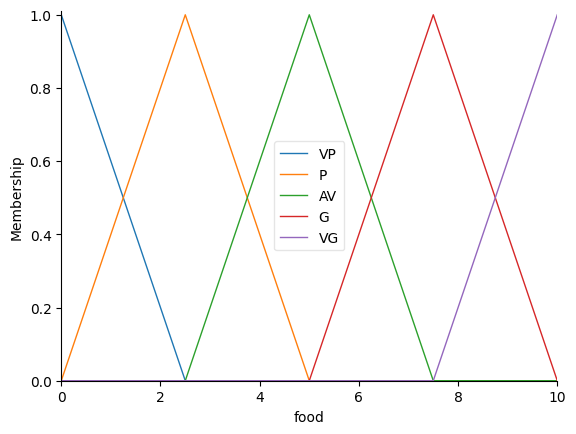

In [54]:
### Tiping in Restaurant 

import numpy as np 
import skfuzzy.control as ctrl

# Không gian phổ quát giúp tính toán nhanh hơn mà không phải quan tâm độ chính xác 
# Chỉ có những điểm quan trọng bao gồm ở đây 
# làm cho nó có độ phân giải cao hơn là không cần thiết
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,31,61)

# Tạo 3 biến mờ: 2 đầu vào và 1 đầu ra
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Antecedent(universe, 'tip')

# VP: Very Poor, P: Poor, AV: Average, G: Good, VG: Very Good
names = ['VP','P','AV','G','VG']
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)

food.view()

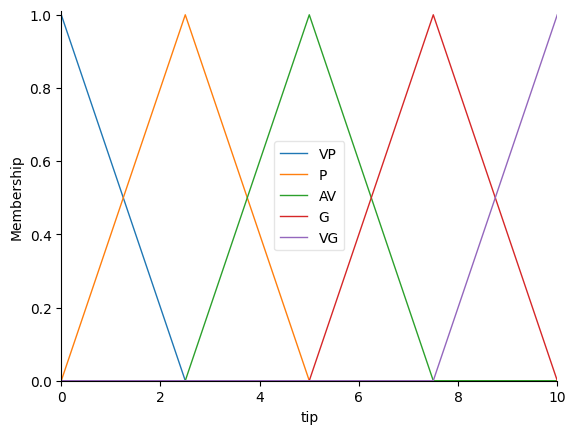

In [55]:
tip.view()

In [56]:
"""
rule0 = ctrl.Rule(antecedent = ((food['VP'] & service['VP'])  |
                                (food['P'] & service['VP'])  |
                                (food['VP'] & service['P'])),
                  consequent = tip['VP'], label = 'rule VP')

rule1 = ctrl.Rule(antecedent = ((food['VP'] & service['AV'])  |
                                (food['VP'] & service['G'])  |
                                (food['P'] & service['P'])  |
                                (food['P'] & service['AV'])  |
                                (food['AV'] & service['P'])  |
                                (food['AV'] & service['VP'])  |
                                (food['G'] & service['VP'])),
                  consequent = tip['P'], label = 'rule P')

rule2 = ctrl.Rule(antecedent = ((food['VP'] & service['VG'])  |
                                (food['P'] & service['G'])  |
                                (food['AV'] & service['AV'])  |
                                (food['G'] & service['P'])  |
                                (food['VG'] & service['VP'])),
                  consequent = tip['AV'], label = 'rule AV')

rule1 = ctrl.Rule(antecedent = ((food['P'] & service['VG'])  |
                                (food['AV'] & service['VG'])  |
                                (food['AV'] & service['G'])  |
                                (food['G'] & service['G'])  |
                                (food['G'] & service['AV'])  |
                                (food['VG'] & service['AV'])  |
                                (food['VG'] & service['P'])),
                  consequent = tip['G'], label = 'rule G')

rule4 = ctrl.Rule(antecedent = ((food['G'] & service['VG'])  |
                                (food['VG'] & service['VG'])  |
                                (food['VG'] & service['G'])),
                  consequent = tip['VG'], label = 'rule VG')

system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61 * 61 + 1)

upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                      linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)
"""

"\nrule0 = ctrl.Rule(antecedent = ((food['VP'] & service['VP'])  |\n                                (food['P'] & service['VP'])  |\n                                (food['VP'] & service['P'])),\n                  consequent = tip['VP'], label = 'rule VP')\n\nrule1 = ctrl.Rule(antecedent = ((food['VP'] & service['AV'])  |\n                                (food['VP'] & service['G'])  |\n                                (food['P'] & service['P'])  |\n                                (food['P'] & service['AV'])  |\n                                (food['AV'] & service['P'])  |\n                                (food['AV'] & service['VP'])  |\n                                (food['G'] & service['VP'])),\n                  consequent = tip['P'], label = 'rule P')\n\nrule2 = ctrl.Rule(antecedent = ((food['VP'] & service['VG'])  |\n                                (food['P'] & service['G'])  |\n                                (food['AV'] & service['AV'])  |\n                                (food[

1910.8509749303623


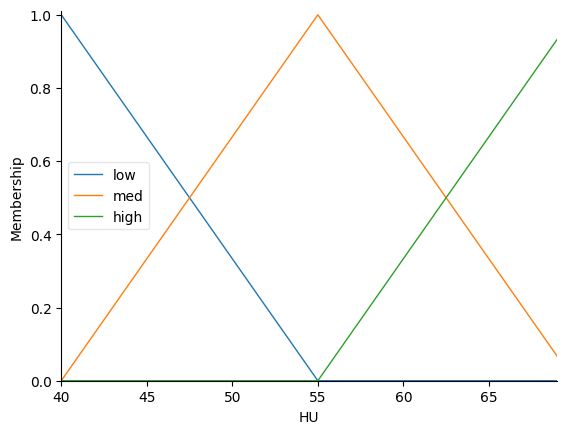

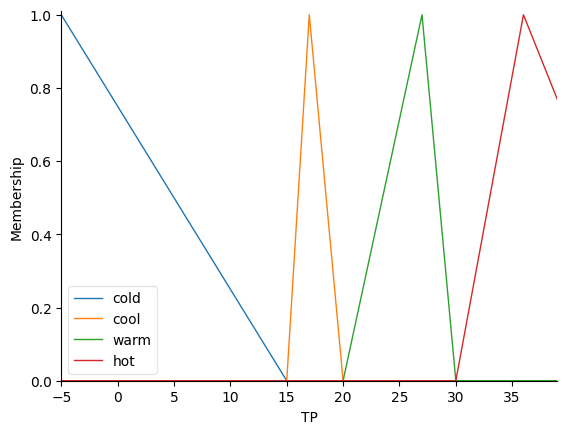

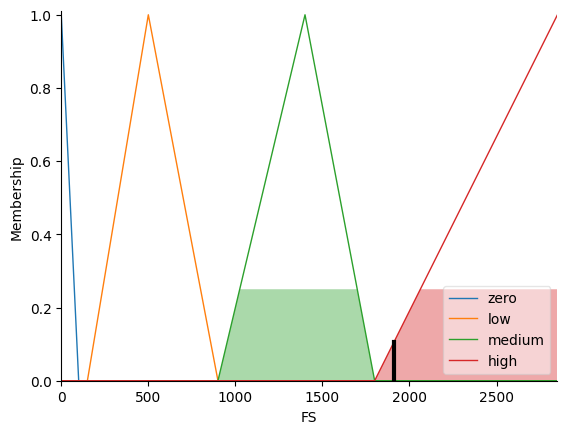

In [68]:
### Ex 2: Temperature Controller

import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# SENSOR1: Temperature (TP)
# SENSOR2: Humidity (HU)  (ĐỘ ẨM)
# Fan_speed (FS)

HU = ctrl.Antecedent(np.arange(40,70,1),'HU')    # 40%->70%
TP = ctrl.Antecedent(np.arange(-5,40,1),'TP')    # -5->40(độ C)
FS = ctrl.Consequent(np.arange(0,2850,1),'FS')   # 0->2850(RPM)

HU['low'] = fuzz.trimf(np.arange(40,70,1),[40,40,55])
HU['med'] = fuzz.trimf(np.arange(40,70,1),[40,55,70])
HU['high'] = fuzz.trimf(np.arange(40,70,1),[55,70,70])

TP['cold'] = fuzz.trimf(np.arange(-5,40,1),[-5,-5,15])
TP['cool'] = fuzz.trimf(np.arange(-5,40,1),[15,17,20])
TP['warm'] = fuzz.trimf(np.arange(-5,40,1),[20,27,30])
TP['hot'] = fuzz.trimf(np.arange(-5,40,1),[30,36,49])

FS['zero'] = fuzz.trimf(np.arange(0,2850,1),[0,0,100])
FS['low'] = fuzz.trimf(np.arange(0,2850,1),[150,500,900])
FS['medium'] = fuzz.trimf(np.arange(0,2850,1),[900,1400,1800])
FS['high'] = fuzz.trimf(np.arange(0,2850,1),[1800,2850,2850])

#----------------------------------------------------------------------
#(1)
rule1 = ctrl.Rule(TP['cold'] & HU['high'],FS['high'])
rule2 = ctrl.Rule(TP['cool'] & HU['high'],FS['medium'])
rule3 = ctrl.Rule(TP['warm'] & HU['high'],FS['low'])
rule4 = ctrl.Rule(TP['hot'] & HU['high'],FS['zero'])
#(2)
rule5 = ctrl.Rule(TP['cold'] & HU['med'],FS['medium'])
rule6 = ctrl.Rule(TP['cool'] & HU['med'],FS['low'])
rule7 = ctrl.Rule(TP['warm'] & HU['med'],FS['zero'])
rule8 = ctrl.Rule(TP['hot'] & HU['med'],FS['zero'])
#(3)
rule9 = ctrl.Rule(TP['cold'] & HU['low'],FS['medium'])
rule10 = ctrl.Rule(TP['cool'] & HU['low'],FS['low'])
rule11 = ctrl.Rule(TP['warm'] & HU['low'],FS['zero'])
rule12 = ctrl.Rule(TP['hot'] & HU['low'],FS['zero'])


tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['HU'] = 65      ## 40%->70%
tipping.input['TP'] = 10      ## -5->40(độ C)
tipping.compute()
print(tipping.output['FS'])
HU.view()
TP.view()
FS.view(sim = tipping)

109.02845183668153
141.47662702610302


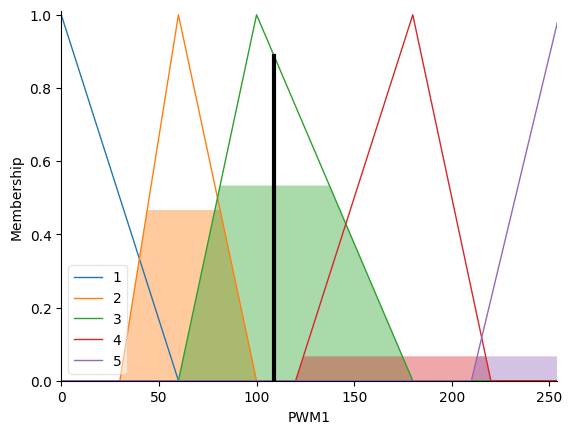

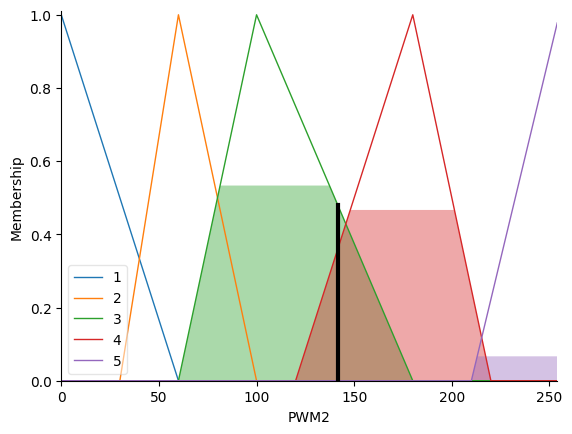

In [70]:
### Ex 3: Mobile Robot

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

C = ctrl.Antecedent(np.arange(0, 150, 1), 'C')
L = ctrl.Antecedent(np.arange(0, 150, 1), 'L')
R = ctrl.Antecedent(np.arange(0, 150, 1), 'R')
LC = ctrl.Antecedent(np.arange(0, 90, 1), 'LC')
RC = ctrl.Antecedent(np.arange(-90, 0, 1), 'RC')
pwm1 = ctrl.Consequent(np.arange(0, 255, 1), 'PWM1')
pwm2 = ctrl.Consequent(np.arange(0, 255, 1), 'PWM2')
LC= ctrl.Consequent(np.arange(0, 90, 1), 'LC')
RC= ctrl.Consequent(np.arange(-90, 0, 1), 'RC')

L['low'] = fuzz.trimf(L.universe,[0,0,75])
L['medium'] = fuzz.trimf(L.universe,[0,75,150])
L['high'] = fuzz.trimf(L.universe,[75,150,150])

C['low'] = fuzz.trimf(C.universe,[0,0,75])
C['medium'] = fuzz.trimf(C.universe,[0,75,150])
C['high'] = fuzz.trimf(C.universe,[75,150,150])

R['low'] = fuzz.trimf(R.universe,[0,0,75])
R['medium'] = fuzz.trimf(R.universe,[0,75,150])
R['high'] = fuzz.trimf(R.universe,[75,150,150])

LC['low'] = fuzz.trimf(LC.universe,[0,0,45])
LC['medium'] = fuzz.trimf(LC.universe,[0,45,90])
LC['high'] = fuzz.trimf(LC.universe,[45,90,90])

RC['low'] = fuzz.trimf(RC.universe,[-90,-90,-45])
RC['medium'] = fuzz.trimf(RC.universe,[-90,-45,0])
RC['high'] = fuzz.trimf(RC.universe,[-45,0,0])

pwm1['1'] = fuzz.trimf(pwm1.universe,[0,0,60])
pwm1['2'] = fuzz.trimf(pwm1.universe,[30,60,100])
pwm1['3'] = fuzz.trimf(pwm1.universe,[60,100,180])
pwm1['4'] = fuzz.trimf(pwm1.universe,[120,180,220])
pwm1['5'] = fuzz.trimf(pwm1.universe,[210,255,255])

pwm2['1'] = fuzz.trimf(pwm2.universe,[0,0,60])
pwm2['2'] = fuzz.trimf(pwm2.universe,[30,60,100])
pwm2['3'] = fuzz.trimf(pwm2.universe,[60,100,180])
pwm2['4'] = fuzz.trimf(pwm2.universe,[120,180,220])
pwm2['5'] = fuzz.trimf(pwm2.universe,[210,255,255])

#----------------------------------------------------------------------

#(1)
rule1=ctrl.Rule(R['low']&C['low']&L['medium'],RC['low'])
rule2=ctrl.Rule(R['low']&C['low']&L['high'],RC['medium'])
rule3=ctrl.Rule(R['medium']&C['medium']&L['low'],RC['medium'])
rule4=ctrl.Rule(R['medium']&C['medium']&L['high'],RC['high'])
rule5=ctrl.Rule(R['high']&C['high']&L['low'],RC['low'])
rule6=ctrl.Rule(R['high']&C['high']&L['medium'],RC['high'])

#(2)
rule7=ctrl.Rule(R['low']&C['low']&L['medium'],LC['low'])
rule8=ctrl.Rule(R['low']&C['low']&L['high'],LC['medium'])
rule9=ctrl.Rule(R['medium']&C['medium']&L['low'],LC['medium'])
rule10=ctrl.Rule(R['medium']&C['medium']&L['high'],LC['high'])
rule11=ctrl.Rule(R['high']&C['high']&L['low'],LC['low'])
rule12=ctrl.Rule(R['high']&C['high']&L['medium'],LC['high'])

#(3)
rule13=ctrl.Rule(L['low']&C['low']&R['low'],[pwm1['5'],pwm2['5']])
rule14=ctrl.Rule(L['medium']&C['medium']&R['medium'],[pwm1['3'],pwm2['3']])
rule15=ctrl.Rule(L['high']&C['high']&R['high'],[pwm1['1'],pwm2['1']])
rule16=ctrl.Rule(LC['low'],[pwm1['4'],pwm2['5']])
rule17=ctrl.Rule(LC['medium'],[pwm1['2'],pwm2['4']])
rule18=ctrl.Rule(LC['high'],[pwm1['1'],pwm2['3']])
rule19=ctrl.Rule(LC['low'],[pwm1['4'],pwm2['5']])
rule20=ctrl.Rule(LC['medium'],[pwm1['2'],pwm2['4']])
rule21=ctrl.Rule(LC['high'],[pwm1['1'],pwm2['3']])


tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                 rule6,rule7,rule8,rule9,rule10,
                                 rule11,rule12,rule13,rule14,rule15,
                                 rule16,rule17,rule18,rule19,rule20,rule21])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['R']=60
tipping.input['L']=40
tipping.input['C']=70
tipping.compute()
print(tipping.output['PWM1'])
print(tipping.output['PWM2'])

pwm1.view(sim=tipping)
pwm2.view(sim=tipping)